<a href="https://colab.research.google.com/github/ajbsarmi/AAC_CreditCard_Clustering_Regression/blob/main/Notebooks/2_Data_Transformation_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview of the notebook:


*   Data Transformation
*   Exploratory Data Analysis

----

by: Arden Sarmiento



# Data Transformation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

In [ ]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This code imports a library "os" that allows file navigation
import os

# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/Development/DSF/DSFC13 Sprint 1')

In [ ]:
# Create data frame
df = pd.read_csv("Data/cc_clean.csv")
df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",31/07/1961,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92427,3.530000e+15,M,Dasmarinas,659019,"Physicist, medical",26/03/1965,2.010000e+11,201000000000,4f77498d91283c4910a636b2e8149dda,1587273415,misc_pos,6.54,2020-04-19 13:16:55
92428,2.470000e+15,M,San Fernando,306659,"Surveyor, quantity",01/11/1935,5.811000e+11,581000000000,d44f411eabd406a76a60546e723a98fd,1628185569,kids_pets,98.23,2021-08-06 01:46:09
92429,3.520000e+15,M,Masbate,95389,Wellsite geologist,20/11/1967,5.310000e+11,531000000000,7e767a74cae901c13f1a9d1d37aa63d4,1621481285,grocery_pos,78.79,2021-05-20 11:28:05
92430,4.620000e+15,M,San Fernando,121812,Personnel officer,20/11/1934,5.550000e+11,555000000000,6ced184c93e66028e8d235ad3060de90,1625341374,personal_care,31.37,2021-07-04 03:42:54


In [ ]:
# Check dtypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92432 entries, 0 to 92431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cc_num          92432 non-null  float64
 1   gender          92432 non-null  object 
 2   city            92432 non-null  object 
 3   city_pop        92432 non-null  int64  
 4   job             92432 non-null  object 
 5   dob             92432 non-null  object 
 6   acct_num        92432 non-null  float64
 7   acct_num2       92432 non-null  int64  
 8   trans_num       92432 non-null  object 
 9   unix_time       92432 non-null  int64  
 10  category        85391 non-null  object 
 11  amt             92432 non-null  float64
 12  trans_datetime  92432 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 9.2+ MB


In [ ]:
# Load the rfm data
rfm_df = pd.read_csv("Data/combined_df.csv")
rfm_df.head()

,acct_num,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster
0,1.240000e+11,24,3,931,3,66457.92,3,9,Top,0
1,1.690000e+11,141,1,9,1,2814.60,1,3,Low,1
2,1.700000e+11,24,3,890,3,64448.85,3,9,Top,0
3,2.010000e+11,25,3,306,2,24489.46,2,7,Top,2
4,2.038000e+11,111,1,12,1,8803.87,1,3,Low,1


In [ ]:
# Combine transacation analysis and rfm data
df = df.merge(rfm_df, on='acct_num', how='inner')
df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,trans_datetime,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,2020-02-10 13:53:31,25,3,300,1,21874.35,2,6,Middle,2
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,2020-04-02 14:51:20,25,3,300,1,21874.35,2,6,Middle,2
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,2021-06-30 12:48:52,25,3,300,1,21874.35,2,6,Middle,2
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,2020-09-30 08:04:14,25,3,300,1,21874.35,2,6,Middle,2
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,2021-06-10 13:40:54,25,3,300,1,21874.35,2,6,Middle,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92377,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,06/12/1955,9.250000e+11,925000000000,599d51e35da1283765ff222e3d13d7e6,1612220880,...,2021-02-02 07:08:00,332,1,10,1,6676.57,1,3,Low,1
92378,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,06/12/1955,9.250000e+11,925000000000,a5f840261880b9f5eb810f20930f2674,1612139200,...,2021-02-01 08:26:40,332,1,10,1,6676.57,1,3,Low,1
92379,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,06/12/1955,9.250000e+11,925000000000,78660bd49282df093fd3fd4640114532,1612220023,...,2021-02-02 06:53:43,332,1,10,1,6676.57,1,3,Low,1
92380,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,06/12/1955,9.250000e+11,925000000000,35a2ab16fa19a23cf4ccbf281e232628,1612258699,...,2021-02-02 17:38:19,332,1,10,1,6676.57,1,3,Low,1


In [ ]:
# Find the minimum and maximum dates
min_date = df['trans_datetime'].min()
max_date = df['trans_datetime'].max()

print(f"The date range of the transactions is from {min_date} to {max_date}.")

The date range of the transactions is from 2020-01-01 08:06:15 to 2021-12-07 07:50:42.


In [ ]:
# Convert to pandas datetimes
df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])

# Convert acct_num to int
df['acct_num'] = df['acct_num'].astype(int)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,trans_datetime,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,2020-02-10 13:53:31,25,3,300,1,21874.35,2,6,Middle,2
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,2020-04-02 14:51:20,25,3,300,1,21874.35,2,6,Middle,2
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,2021-06-30 12:48:52,25,3,300,1,21874.35,2,6,Middle,2
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,2020-09-30 08:04:14,25,3,300,1,21874.35,2,6,Middle,2
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,2021-06-10 13:40:54,25,3,300,1,21874.35,2,6,Middle,2


In [ ]:
# Define the current date
current_date = pd.to_datetime('2022-01-01')

# Change age dtype to date time
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')

#Add the age column
df['age'] = (current_date - df['dob']).dt.days // 365.25
df['age'] = df['age'].astype('int')
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster,age
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,25,3,300,1,21874.35,2,6,Middle,2,63
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,25,3,300,1,21874.35,2,6,Middle,2,63
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,25,3,300,1,21874.35,2,6,Middle,2,63
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,25,3,300,1,21874.35,2,6,Middle,2,63
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,25,3,300,1,21874.35,2,6,Middle,2,63


In [ ]:
# Add time of day

def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['trans_datetime'].dt.hour.apply(classify_time_of_day)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster,age,time_of_day
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,3,300,1,21874.35,2,6,Middle,2,63,Afternoon
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,3,300,1,21874.35,2,6,Middle,2,63,Afternoon
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,3,300,1,21874.35,2,6,Middle,2,63,Afternoon
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,3,300,1,21874.35,2,6,Middle,2,63,Morning
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,3,300,1,21874.35,2,6,Middle,2,63,Afternoon


In [ ]:
# Add season
def classify_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month <= 3 and (month < 3 or (month == 3 and day <= 19))):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month <= 6 and (month < 6 or (month == 6 and day <= 20))):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month <= 9 and (month < 9 or (month == 9 and day <= 21))):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the entire trans_datetime column
df['season'] = df['trans_datetime'].apply(classify_season)
df.head()


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster,age,time_of_day,season
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,300,1,21874.35,2,6,Middle,2,63,Afternoon,Winter
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,300,1,21874.35,2,6,Middle,2,63,Afternoon,Spring
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,300,1,21874.35,2,6,Middle,2,63,Afternoon,Summer
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,300,1,21874.35,2,6,Middle,2,63,Morning,Fall
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,300,1,21874.35,2,6,Middle,2,63,Afternoon,Spring


In [ ]:
# Create age segment
def age_segment(age):
    if 50 <= age <= 59:
        return 'Middle-aged Adults'
    elif 60 <= age <= 69:
        return 'Pre-Retirees'
    elif 70 <= age <= 79:
        return 'Young Seniors'
    else:
        return 'Older Seniors'

df['age_segment'] = df['age'].apply(age_segment)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,frequency_score,total_amt,monetary_score,rfm_score,rfm_level,cluster,age,time_of_day,season,age_segment
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,1,21874.35,2,6,Middle,2,63,Afternoon,Winter,Pre-Retirees
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,1,21874.35,2,6,Middle,2,63,Afternoon,Spring,Pre-Retirees
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,1,21874.35,2,6,Middle,2,63,Afternoon,Summer,Pre-Retirees
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,1,21874.35,2,6,Middle,2,63,Morning,Fall,Pre-Retirees
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,1,21874.35,2,6,Middle,2,63,Afternoon,Spring,Pre-Retirees


In [ ]:
# Create month column
df["month"] = df.trans_datetime.dt.month #01
df["month_abbr"] = df.trans_datetime.dt.strftime('%b')

# Create a quarter column
df['quarter'] = 'Q' + ((df['month']/4).astype(int) + 1).astype(str)
df.head()

# Create a year column
df['year'] = df['trans_datetime'].dt.year

df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,rfm_level,cluster,age,time_of_day,season,age_segment,month,month_abbr,quarter,year
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,Middle,2,63,Afternoon,Winter,Pre-Retirees,2,Feb,Q1,2020
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,Middle,2,63,Afternoon,Spring,Pre-Retirees,4,Apr,Q2,2020
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,Middle,2,63,Afternoon,Summer,Pre-Retirees,6,Jun,Q2,2021
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,Middle,2,63,Morning,Fall,Pre-Retirees,9,Sep,Q3,2020
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,Middle,2,63,Afternoon,Spring,Pre-Retirees,6,Jun,Q2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92377,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,599d51e35da1283765ff222e3d13d7e6,1612220880,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92378,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,a5f840261880b9f5eb810f20930f2674,1612139200,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92379,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,78660bd49282df093fd3fd4640114532,1612220023,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92380,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,35a2ab16fa19a23cf4ccbf281e232628,1612258699,...,Low,1,66,Evening,Winter,Pre-Retirees,2,Feb,Q1,2021


In [ ]:
# Check null rows
df.isnull().sum()

cc_num                0
gender                0
city                  0
city_pop              0
job                   0
dob                   0
acct_num              0
acct_num2             0
trans_num             0
unix_time             0
category           7039
amt                   0
trans_datetime        0
recency               0
recency_score         0
frequency             0
frequency_score       0
total_amt             0
monetary_score        0
rfm_score             0
rfm_level             0
cluster               0
age                   0
time_of_day           0
season                0
age_segment           0
month                 0
month_abbr            0
quarter               0
year                  0
dtype: int64

# Exploratory Data Analysis

## Customer Demographics

In [ ]:
# Check distrubtion of columns
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot_data(column):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

interact(plot_data, column=df.columns);



interactive(children=(Dropdown(description='column', options=('cc_num', 'gender', 'city', 'city_pop', 'job', '…

In [ ]:
df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,rfm_level,cluster,age,time_of_day,season,age_segment,month,month_abbr,quarter,year
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,Middle,2,63,Afternoon,Winter,Pre-Retirees,2,Feb,Q1,2020
1,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,21c2e9d668ee4cd783b96b2234e27b99,1585810280,...,Middle,2,63,Afternoon,Spring,Pre-Retirees,4,Apr,Q2,2020
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,Middle,2,63,Afternoon,Summer,Pre-Retirees,6,Jun,Q2,2021
3,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,f9e4d4ae841c433af716daac689abada,1601424254,...,Middle,2,63,Morning,Fall,Pre-Retirees,9,Sep,Q3,2020
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,Middle,2,63,Afternoon,Spring,Pre-Retirees,6,Jun,Q2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92377,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,599d51e35da1283765ff222e3d13d7e6,1612220880,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92378,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,a5f840261880b9f5eb810f20930f2674,1612139200,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92379,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,78660bd49282df093fd3fd4640114532,1612220023,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92380,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,35a2ab16fa19a23cf4ccbf281e232628,1612258699,...,Low,1,66,Evening,Winter,Pre-Retirees,2,Feb,Q1,2021


## Transaction Level

## Cluster Level

In [ ]:
df_2021 = df[df['year'] == 2021]
df_2021

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,rfm_level,cluster,age,time_of_day,season,age_segment,month,month_abbr,quarter,year
2,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,140c195908e9b594d6d7aedc3b37e1cd,1625028532,...,Middle,2,63,Afternoon,Summer,Pre-Retirees,6,Jun,Q2,2021
4,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,535ab408ca63398a6c7dce38124dc706,1623303654,...,Middle,2,63,Afternoon,Spring,Pre-Retirees,6,Jun,Q2,2021
5,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,e7969b32faa5d9b54dc2129532866de2,1622332940,...,Middle,2,63,Morning,Spring,Pre-Retirees,5,May,Q2,2021
6,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,9cd896707a49cf071357141b26c43213,1620310443,...,Middle,2,63,Night,Spring,Pre-Retirees,5,May,Q2,2021
12,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,7e98767ec2cb253363c2c59e434001b7,1636290324,...,Middle,2,63,Night,Fall,Pre-Retirees,11,Nov,Q3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92377,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,599d51e35da1283765ff222e3d13d7e6,1612220880,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92378,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,a5f840261880b9f5eb810f20930f2674,1612139200,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92379,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,78660bd49282df093fd3fd4640114532,1612220023,...,Low,1,66,Morning,Winter,Pre-Retirees,2,Feb,Q1,2021
92380,4.160000e+15,M,Tuguegarao,153502,Air cabin crew,1955-12-06,925000000000,925000000000,35a2ab16fa19a23cf4ccbf281e232628,1612258699,...,Low,1,66,Evening,Winter,Pre-Retirees,2,Feb,Q1,2021


### Cluster 0 - Top Customers

In [ ]:
# Filter data for cluster 0 only
cluster_zero = df_2021[df_2021['cluster']== 0]
cluster_zero

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,rfm_level,cluster,age,time_of_day,season,age_segment,month,month_abbr,quarter,year
658,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,01ae0f68943e49b24b6beb9d3e7b0643,1634172737,...,Top,0,51,Morning,Fall,Middle-aged Adults,10,Oct,Q3,2021
662,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,037dca24485b45c2ceeaa95a7f5483b4,1623373477,...,Top,0,51,Morning,Spring,Middle-aged Adults,6,Jun,Q2,2021
668,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,837ae2a3d9f2a7364008fca2b0dfe777,1628987078,...,Top,0,51,Morning,Summer,Middle-aged Adults,8,Aug,Q3,2021
669,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,844e9140131fea712346ed3b145e9093,1610161020,...,Top,0,51,Morning,Winter,Middle-aged Adults,1,Jan,Q1,2021
675,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,5b7e1105754182eaa09df6421e3db7c3,1622080277,...,Top,0,51,Morning,Spring,Middle-aged Adults,5,May,Q2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90203,4.510000e+18,M,Caloocan City,1583978,Learning mentor,1957-11-06,213000000000,213000000000,df656efab3f0fdb731e93d65a767267d,1632744196,...,Top,0,64,Evening,Fall,Pre-Retirees,9,Sep,Q3,2021
90210,4.510000e+18,M,Caloocan City,1583978,Learning mentor,1957-11-06,213000000000,213000000000,f0e92f4760ad3f0be14d5e0faab03af5,1609542854,...,Top,0,64,Morning,Winter,Pre-Retirees,1,Jan,Q1,2021
90211,4.510000e+18,M,Caloocan City,1583978,Learning mentor,1957-11-06,213000000000,213000000000,cdb4596d45262d5e200fb85f2bc067e8,1609568670,...,Top,0,64,Afternoon,Winter,Pre-Retirees,1,Jan,Q1,2021
90213,4.510000e+18,M,Caloocan City,1583978,Learning mentor,1957-11-06,213000000000,213000000000,4dff65f753f7369b6aba5401da9ea681,1618900262,...,Top,0,64,Afternoon,Spring,Pre-Retirees,4,Apr,Q2,2021


#### Category Level

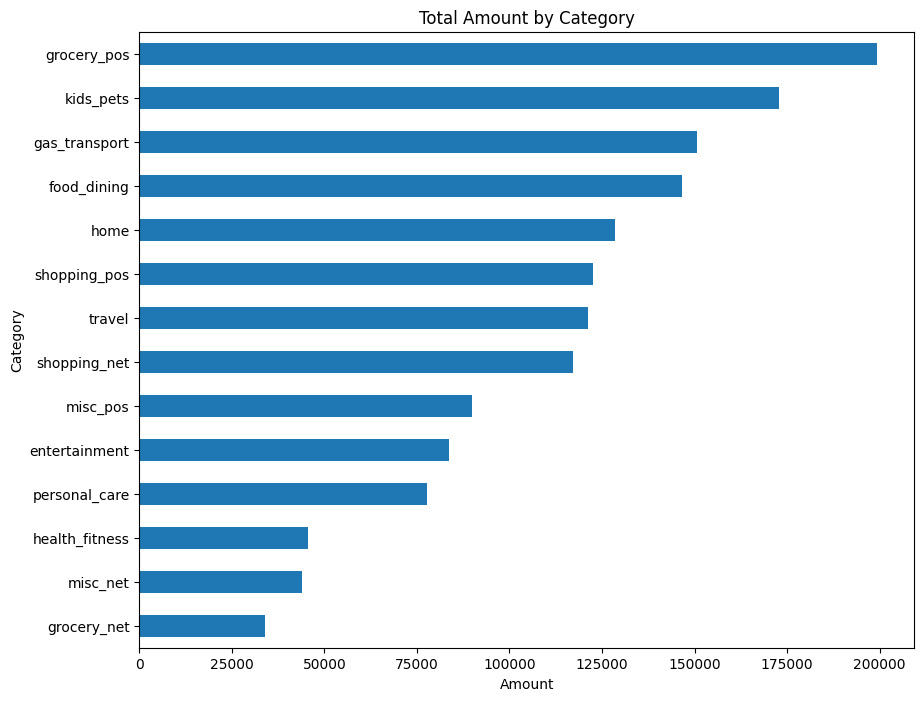

In [ ]:
# Group by category and sum and create a horizontal bar chart
top3_zero_category = cluster_zero.groupby('category')['amt'].sum()


# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
top3_zero_category.sort_values().plot(kind='barh')

# Adding labels and title
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Total Amount by Category')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['cc_num', 'gender', 'city', 'city_pop', 'job', 'dob', 'acct_num',
       'acct_num2', 'trans_num', 'unix_time', 'category', 'amt',
       'trans_datetime', 'recency', 'recency_score', 'frequency',
       'frequency_score', 'total_amt', 'monetary_score', 'rfm_score',
       'rfm_level', 'cluster', 'age', 'time_of_day', 'season', 'age_segment',
       'month', 'month_abbr', 'quarter', 'year'],
      dtype='object')

#### Transaction Analysis


In [ ]:
# Get the minimum and maximum dates
min_date = df['trans_datetime'].min()
max_date = df['trans_datetime'].max()

# Get the unique years covered by the data
years_covered = df['trans_datetime'].dt.year.unique()

print("Date Range: ", min_date, " to ", max_date)
print("Years Covered: ", years_covered)

Date Range:  2020-01-01 08:06:15  to  2021-12-07 07:50:42
Years Covered:  [2020 2021]


#### Account Level

In [ ]:
# Analyze the clustering results, account level
cluster_summary = rfm_df.groupby('cluster').agg({
    'recency': ['mean', 'median'],
    'frequency': ['mean', 'median'],
    'total_amt': ['mean', 'median'],
    'acct_num': 'count'
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['cluster', 'recency_mean', 'recency_median', 'frequency_mean', 'frequency_median', 'total_amt_mean', 'total_amt_median', 'count']

# Display the cluster summary
cluster_summary

,cluster,recency_mean,recency_median,frequency_mean,frequency_median,total_amt_mean,total_amt_median,count
0,0,24.500000,24.5,906.000000,920.5,63802.383077,62781.35,26
1,1,191.764706,141.0,8.470588,9.0,5130.120000,5573.74,17
2,2,24.866667,25.0,434.977778,321.0,29993.049778,25566.60,45
